In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [118]:
#read the CSV file and get information on the data
df = pd.read_csv("Cost_of_Living_Index_by_Country_short.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Rank                            20 non-null     int64  
 1   Country                         20 non-null     object 
 2   Cost of Living Index            20 non-null     float64
 3   Rent Index                      20 non-null     float64
 4   Cost of Living Plus Rent Index  20 non-null     float64
 5   Groceries Index                 20 non-null     float64
 6   Restaurant Price Index          20 non-null     float64
 7   Local Purchasing Power Index    20 non-null     float64
dtypes: float64(6), int64(1), object(1)
memory usage: 1.4+ KB


In [27]:
# Describe the basic statistics of the table
df.describe()

,Rank,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
count,20.00000,20.000000,20.000000,20.000000,20.000000,20.00000,20.000000
mean,10.50000,70.970000,34.045000,53.240000,73.210000,66.59500,113.400000
std,5.91608,9.931402,13.143799,9.507415,12.127997,12.73311,30.310637
min,1.00000,62.400000,19.000000,42.300000,59.300000,46.20000,43.500000
25%,5.75000,63.600000,25.050000,45.900000,64.100000,58.75000,102.400000
50%,10.50000,67.650000,33.300000,51.050000,71.550000,64.45000,112.900000
75%,15.25000,76.150000,40.800000,57.900000,79.450000,70.42500,125.475000
max,20.00000,101.100000,67.200000,74.900000,109.100000,97.00000,182.500000


In [37]:
#Calculate the correlations for all columns except Rank and Country columns
columns_matrix = df.drop(columns=['Rank','Country'])
correlations = columns_matrix.corr(method='kendall')
print(correlations)

                                Cost of Living Index  Rent Index  \
Cost of Living Index                        1.000000    0.221053   
Rent Index                                  0.221053    1.000000   
Cost of Living Plus Rent Index              0.511875    0.712404   
Groceries Index                             0.680741    0.184697   
Restaurant Price Index                      0.294737    0.105263   
Local Purchasing Power Index                0.015831    0.269130   

                                Cost of Living Plus Rent Index  \
Cost of Living Index                                  0.511875   
Rent Index                                            0.712404   
Cost of Living Plus Rent Index                        1.000000   
Groceries Index                                       0.455026   
Restaurant Price Index                                0.332455   
Local Purchasing Power Index                          0.211640   

                                Groceries Index  Restaurant 

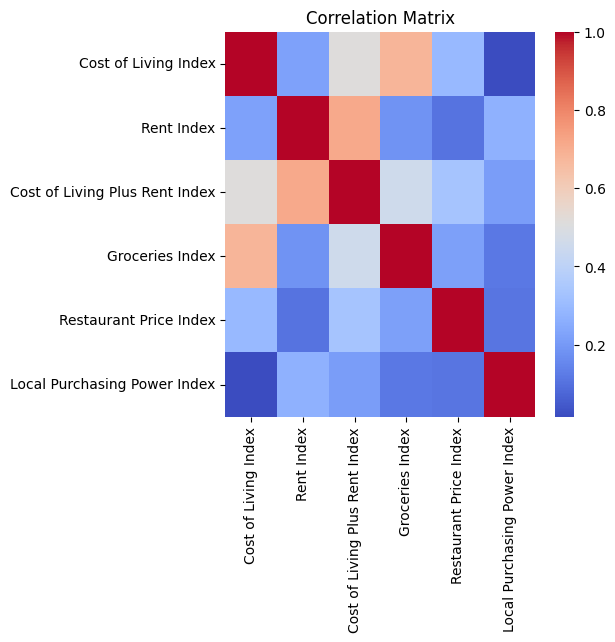

In [41]:
# Visualise the correlations in the form of a heatmap
import seaborn as sns
plt.figure(figsize=(5,5))
sns.heatmap(correlations,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

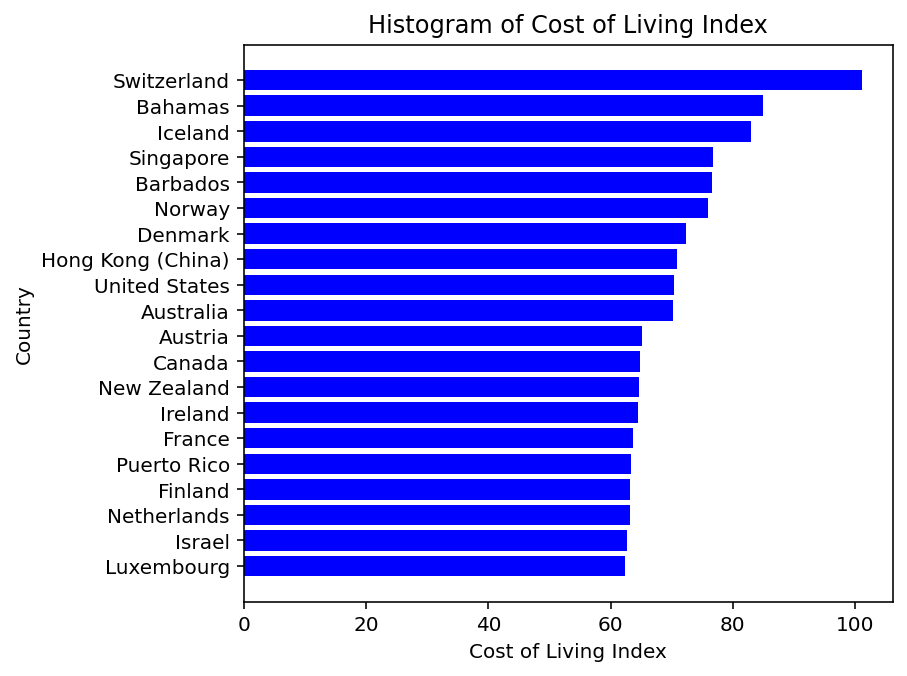

In [108]:
#Plot a histogram for Cost of Living Index column for all Countries
#Define function for the histogram
def plot_cost_of_living_histogram(df):
    """
    Create a histogram for the Cost of Living Index for each country.
    """
    plt.figure(dpi=144)
    plt.barh(df.sort_values('Cost of Living Index', ascending=True)['Country'], 
             df.sort_values('Cost of Living Index', ascending=True)['Cost of Living Index'], 
             color='blue')
    plt.ylabel('Country')
    plt.xlabel('Cost of Living Index')
    plt.title('Histogram of Cost of Living Index')
    plt.tight_layout()
    plt.show()

# Call the function
plot_cost_of_living_histogram(df)

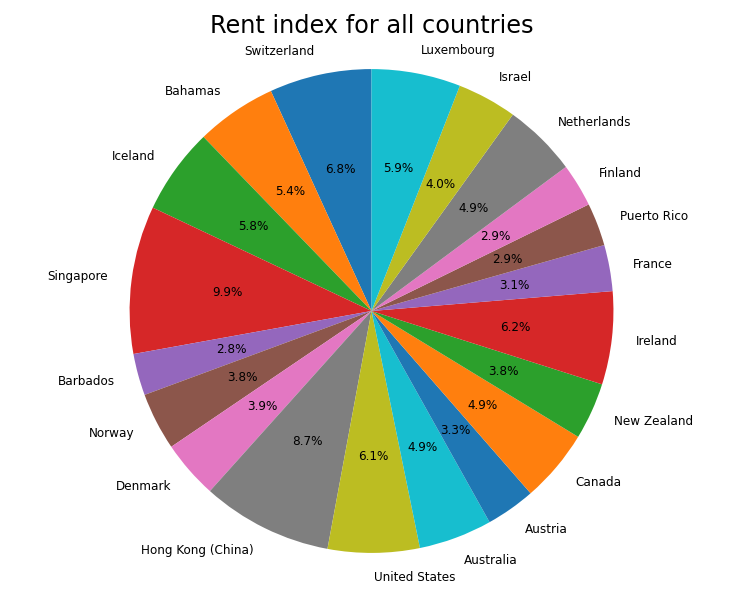

In [102]:
#Plot a pie chart for Rent index for all countries
plt.figure(dpi=144)
plt.pie(df['Rent Index'], labels=df['Country'], textprops={'fontsize': 6},
startangle=90,autopct='%1.1f%%') 
plt.title('Rent index for all countries') 
plt.axis('Equal')
plt.show()

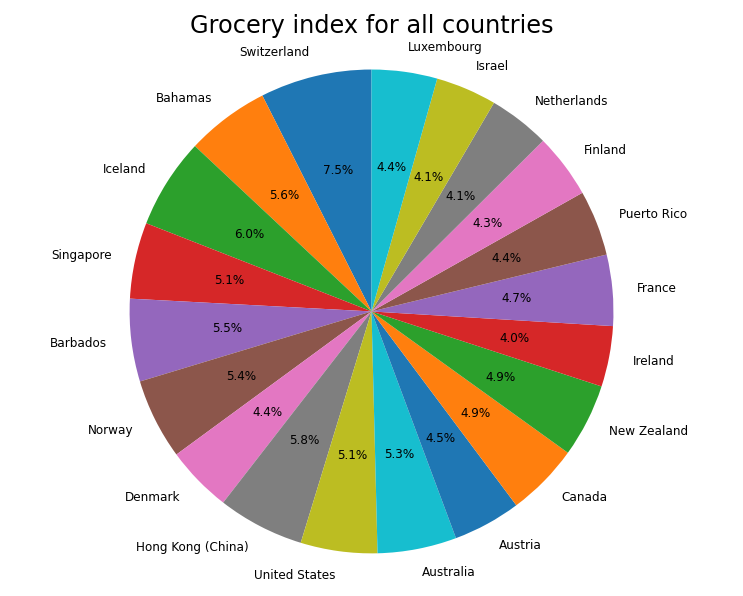

In [104]:
#Plot a pie chart for Grocery index for all countries
plt.figure(dpi=144)
plt.pie(df['Groceries Index'], labels=df['Country'], textprops={'fontsize': 6},
startangle=90,autopct='%1.1f%%') 
plt.title('Grocery index for all countries') 
plt.axis('Equal')
plt.show()

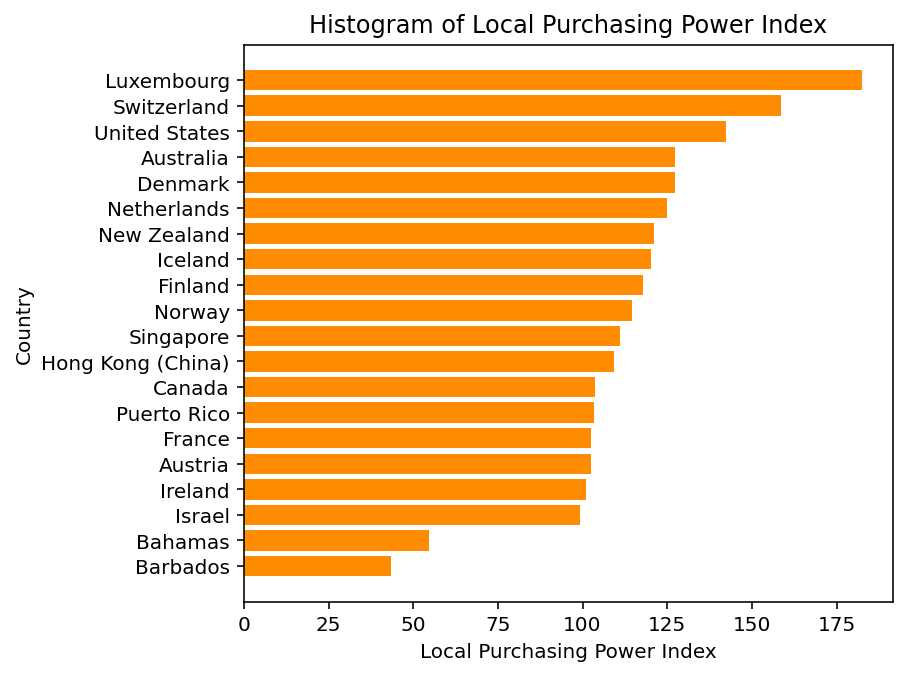

In [113]:
#Plot a histogram for Local Purchasing power Index column for all Countries
#Define function for the histogram
def plot_purchasing_power_histogram(df):
    """
    Create a histogram for the purchasing power for each country.
    """
    plt.figure(dpi=144)
    plt.barh(df.sort_values('Local Purchasing Power Index', ascending=True)['Country'], 
             df.sort_values('Local Purchasing Power Index', ascending=True)['Local Purchasing Power Index'], 
             color='darkorange')
    plt.ylabel('Country')
    plt.xlabel('Local Purchasing Power Index')
    plt.title('Histogram of Local Purchasing Power Index')
    plt.tight_layout()
    plt.show()

# Call the function
plot_purchasing_power_histogram(df)

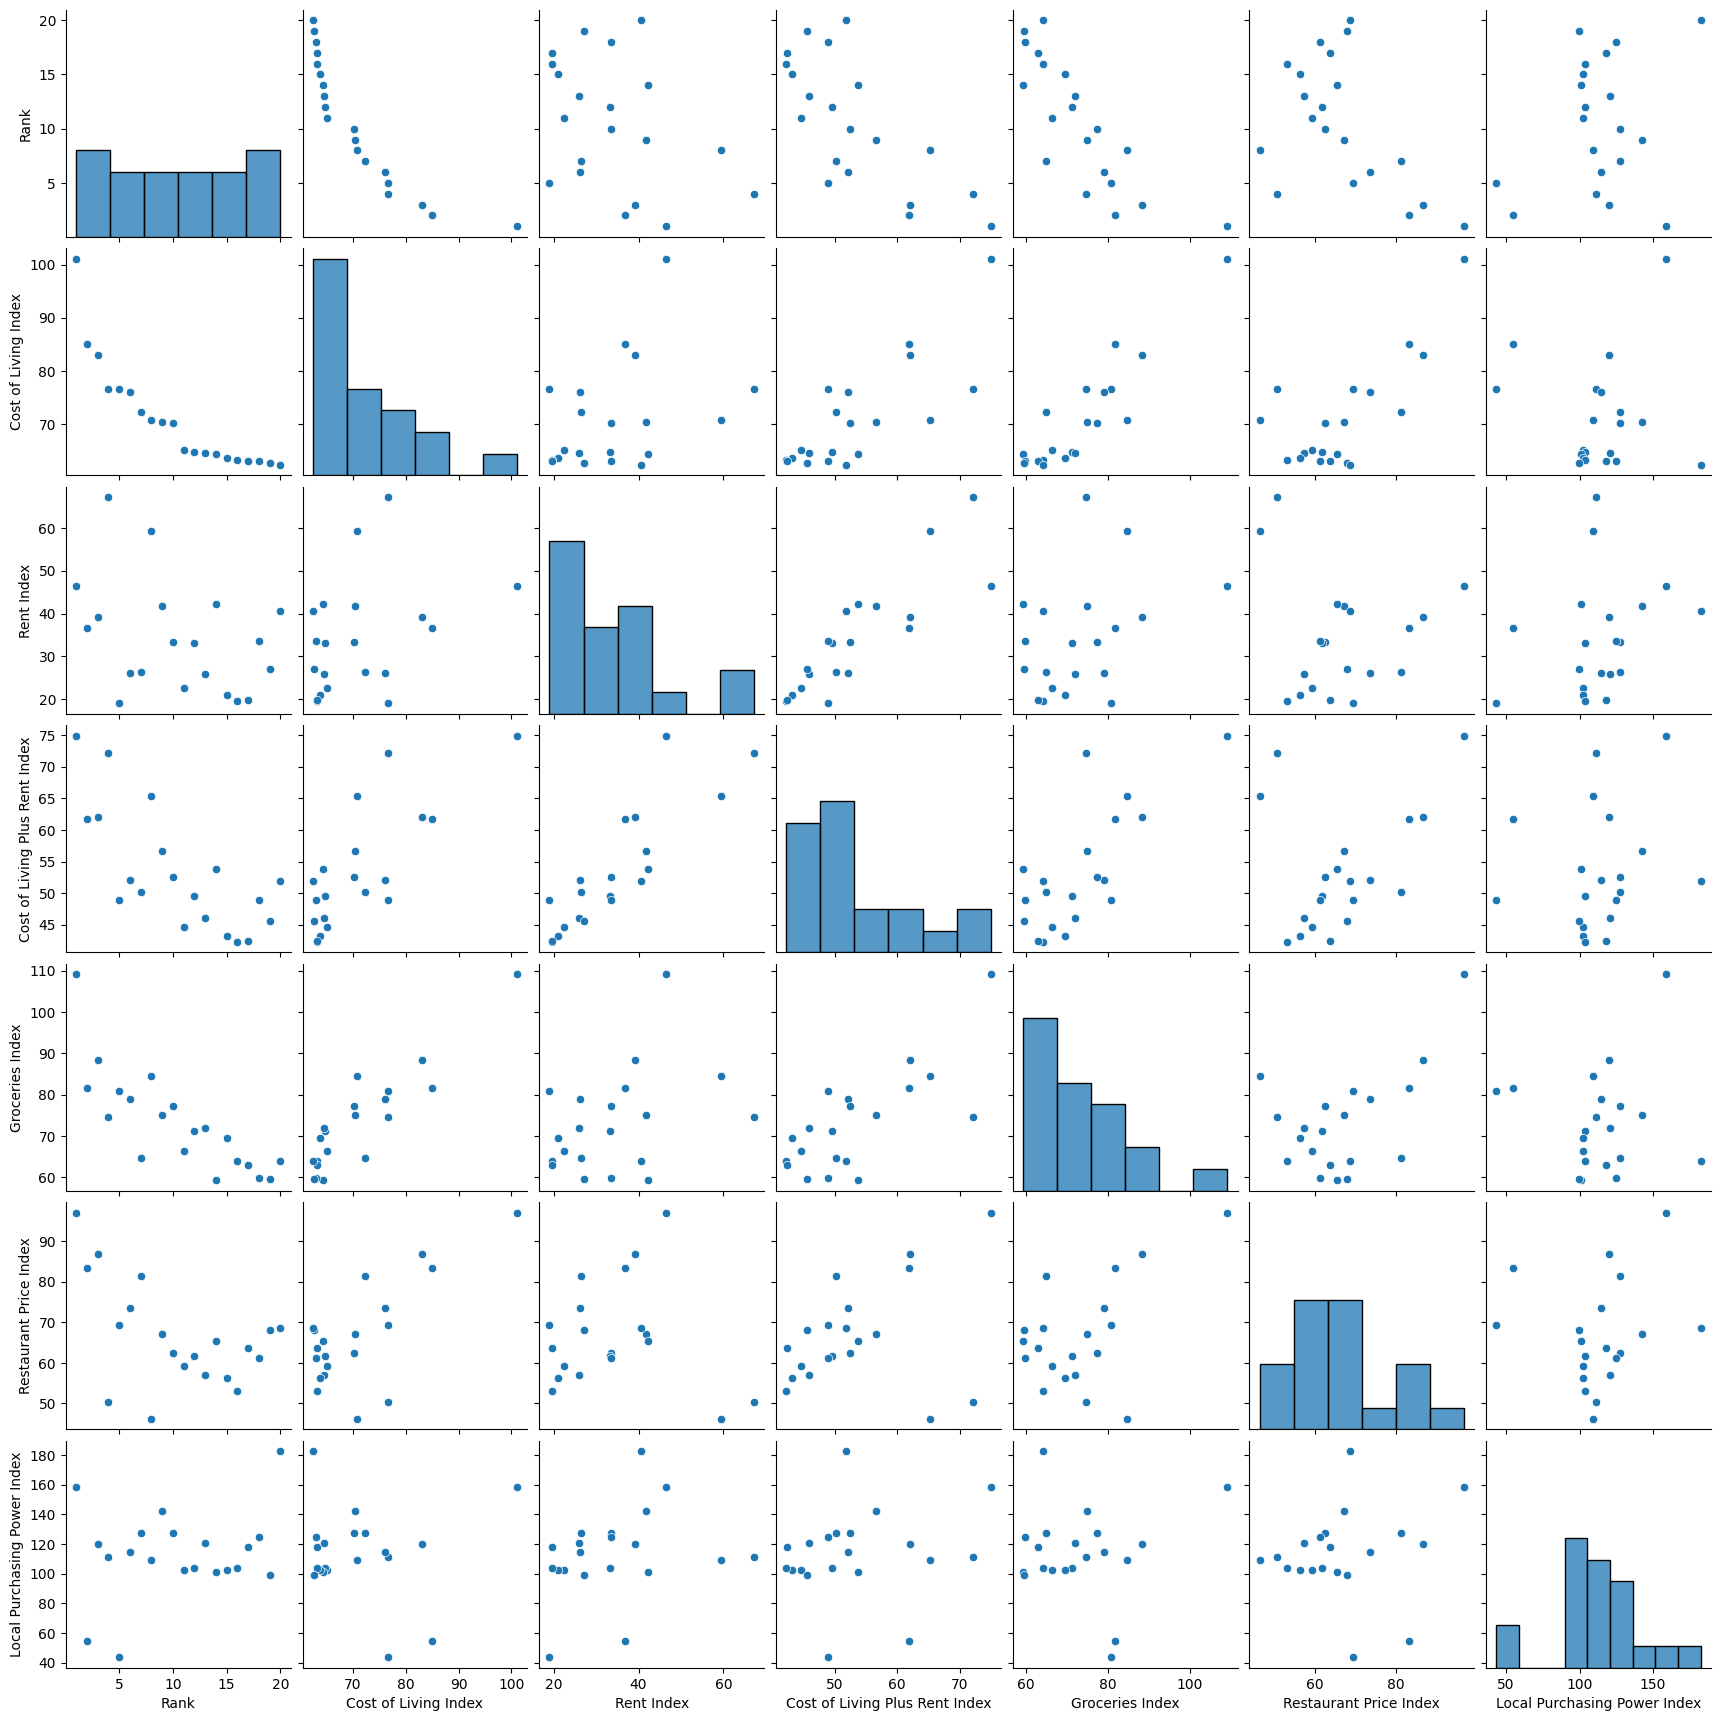

<Figure size 140.8x105.6 with 0 Axes>

In [147]:
#Visualise a pairplot to show correlation for all columns of the table
sns.pairplot(df)
plt.figure(dpi=22)
plt.show()

In [134]:
#Calculate the Covariance for all columns except Rank and Country
columns_matrix = df.drop(columns=['Rank','Country'])
covariance = columns_matrix.cov()
print(covariance)

                                Cost of Living Index  Rent Index  \
Cost of Living Index                       98.632737   48.257737   
Rent Index                                 48.257737  172.759447   
Cost of Living Plus Rent Index             74.396526  107.897579   
Groceries Index                           108.842421   60.247947   
Restaurant Price Index                     91.238789  -10.160816   
Local Purchasing Power Index               -3.967368  112.729474   

                                Cost of Living Plus Rent Index  \
Cost of Living Index                                 74.396526   
Rent Index                                          107.897579   
Cost of Living Plus Rent Index                       90.390947   
Groceries Index                                      85.450632   
Restaurant Price Index                               42.575474   
Local Purchasing Power Index                         52.254737   

                                Groceries Index  Restaurant 

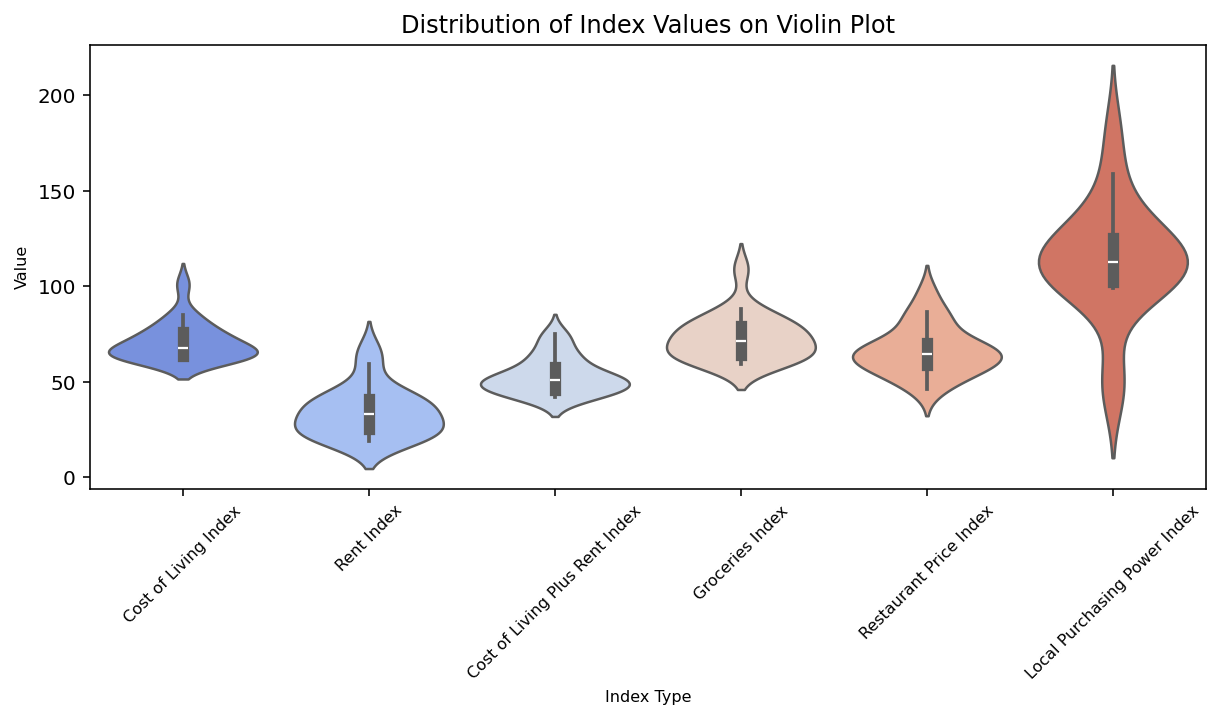

In [156]:
# Drop unwanted columns
columns_matrix = df.drop(columns=['Rank', 'Country'])

# Create violin plot
plt.figure(dpi=144, figsize=(10, 4))
sns.violinplot(columns_matrix, palette='coolwarm')
plt.title('Distribution of Index Values on Violin Plot')
plt.xlabel('Index Type',fontsize=8)
plt.ylabel('Value',fontsize=8)
plt.xticks(rotation=45, fontsize=8)
plt.show()